### Trying to form clusters around the data of the 3 different flower species

In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
iris.target ,iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df = df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns')

In [14]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


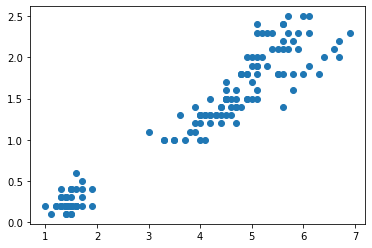

In [16]:
plt.scatter (df['petal length (cm)'],df['petal width (cm)'])

In [40]:
km = KMeans(n_clusters=3)

In [41]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [42]:
df['cluster'] = y_predicted

In [43]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


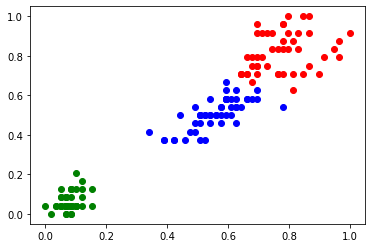

In [44]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')

In [45]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df[['petal length (cm)']] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']] = scaler.transform(df[['petal width (cm)']])

In [46]:
km = KMeans(n_clusters=3)

In [47]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [48]:
df['cluster'] = y_predicted


In [49]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [51]:
centers=km.cluster_centers_

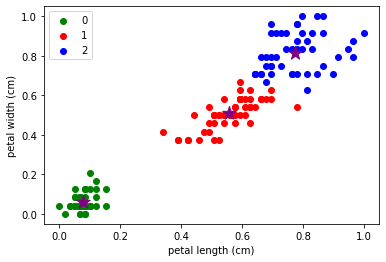

In [52]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(centers[:,0],centers[:,1],color='purple',marker='*',s=200)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend('012')

In [53]:
k_rng = range(1,10)
sse = []


In [55]:
for k in k_rng:
    km =  KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

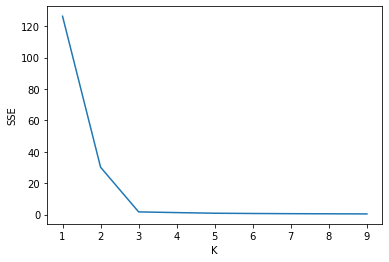

In [56]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)